In [1]:
import pandas as pd
import numpy as np
import seaborn as sb #let's also try the seaborn library in this lab

### Imputation

In [4]:
df = pd.read_csv("Counties2010.csv")
df.head()

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
0,Aleutians East,AK,3141,2697,28942,12.5,475,4.5,6981.94
1,Aleutians West,AK,5561,5465,33318,8.5,1050,4.9,4390.28
2,Anchorage,AK,291826,260283,46243,32.3,921,18.0,1704.68
3,Bethel,AK,17013,16006,26990,14.4,845,6.7,40570.00
4,Bristol Bay,AK,997,1258,48747,14.2,687,9.2,503.84


In [5]:
df[df.IncomePerCapita == 0]

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
22,Skagway,AK,968,0,0,31.0,852,4.4,452.33
26,Wrangell,AK,2369,0,0,14.8,596,14.3,2541.48
547,Kalawao,HI,90,147,0,25.6,2001,5.7,11.99
1653,Yellowstone National Park,MT,0,0,0,0.0,0,0.0,0.00
2817,Bedford City,VA,6222,6299,0,20.5,450,18.5,6.88
2820,Bristol,VA,17835,17367,0,18.9,395,17.8,13.01
2824,Buena Vista,VA,6650,6349,0,14.8,486,15.1,6.70
2830,Charlottesville,VA,43475,45049,0,43.3,737,15.9,10.24
2834,Clifton Forge,VA,0,4289,0,0.0,0,0.0,0.00
2835,Colonial Heights,VA,17411,16897,0,20.2,674,21.8,7.52


#### We find several 0 values in the dataset. Let's treat these as missing values.

In [6]:
nullvals = df.IncomePerCapita.replace(0, np.NaN)
nullvals

0        28942.0
1        33318.0
2        46243.0
3        26990.0
4        48747.0
          ...   
3141    132728.0
3142     42621.0
3143     40781.0
3144     41992.0
3145     62484.0
Name: IncomePerCapita, Length: 3146, dtype: float64

In [7]:
df[nullvals.isna()]  ##Find NaN

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
22,Skagway,AK,968,0,0,31.0,852,4.4,452.33
26,Wrangell,AK,2369,0,0,14.8,596,14.3,2541.48
547,Kalawao,HI,90,147,0,25.6,2001,5.7,11.99
1653,Yellowstone National Park,MT,0,0,0,0.0,0,0.0,0.00
2817,Bedford City,VA,6222,6299,0,20.5,450,18.5,6.88
2820,Bristol,VA,17835,17367,0,18.9,395,17.8,13.01
2824,Buena Vista,VA,6650,6349,0,14.8,486,15.1,6.70
2830,Charlottesville,VA,43475,45049,0,43.3,737,15.9,10.24
2834,Clifton Forge,VA,0,4289,0,0.0,0,0.0,0.00
2835,Colonial Heights,VA,17411,16897,0,20.2,674,21.8,7.52


#### Let's count them

In [8]:
print(np.count_nonzero(df[nullvals.isna()]))

261


# data cleaning + EDA

We will use [passenger traffic reports](https://www.flydenver.com/about/financials/passenger_traffic) from the Denver International Airport.

The goal is to turn this structured but very untidy and irregular data into something we can simply visualize and reshape.

Following libraries that will come in handy (read the docs):
* pandas [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)
* seaborn [`lineplot`](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

EDA checklist:

1. **Formulate your question** → see “Characteristics of a good question”
2. **Read in your data** → Is it properly formatted? Perform cleanup activities
3. **Check the packaging** → Make sure there are the right number of rows & columns, formats, etc.
4. **Look at the top and bottom of data** → Confirm that all observations are there
5. **Check the “n”s** → Identify “landmark” values and to check expectations (number of states, etc.)
6. **Validate against an external data source** → Right order of magnitude, expected distribution, etc.
7. **Make a plot** → Checking and creating expectations about the shape of data and appropriate analyses
8. **Try an easy solution** → What is the simplest test for your question?

### Formulate your question
How have ridership patterns at DIA changed across airlines over time?

### Read in data
Use pandas's `read_csv` function to read in "den_passengers.csv"

In [10]:
passengers_df = pd.read_csv('den_passengers.csv')
passengers_df.head()

,Month,Total,American,Cargo,Delta,Frontier,Other,Southwest,United,United Express,Grand Total
0,1995-02-01,NaN,5833,0,4805,1434,8625,NaN,47230,2635,70562
1,1995-03-01,NaN,228196,0,200964,36703,245171,NaN,1962445,169190,2842669
2,1995-04-01,NaN,184229,0,157853,40050,191393,NaN,1724836,124351,2422712
3,1995-05-01,NaN,187990,0,162622,41403,171425,NaN,1833305,135800,2532545
4,1995-06-01,NaN,229348,0,198499,43754,186030,NaN,1975754,170033,2803418


### Check the packaging
**Check the packaging** → Make sure there are the right number of rows & columns, formats, etc.

The data should start in February 1995 and go through July 2019.

In [11]:
passengers_df['Month'].min(), passengers_df['Month'].max()

('1995-02-01', '2019-07-01')

#### Data munging

Use [`pd.to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) to convert the "Month" column into valid datetime objects. (Alternatively, use one of the function calls in `read_csv` to do this).

In [12]:
# Before: the data is an "object" type, which typically means text/string
passengers_df['Month'].head()

0    1995-02-01
1    1995-03-01
2    1995-04-01
3    1995-05-01
4    1995-06-01
Name: Month, dtype: object

In [13]:
# After: the data is a datetime type, which lets us do some exciting things later on
passengers_df['Month'] = pd.to_datetime(passengers_df['Month'])
passengers_df['Month'].head()

0   1995-02-01
1   1995-03-01
2   1995-04-01
3   1995-05-01
4   1995-06-01
Name: Month, dtype: datetime64[ns]

### Clean up the data

Make the "Month" column the index using the [`.set_index`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html) method. 

**Why indexing**: Looking up rows by index is much faster than looking up rows by column value.
* You can now lookup using .loc and .iloc instead of by column name.

Here is how you could look up any row where the df['index'] column equals 999. Pandas has to loop through every value in the column to find the ones equal to 999.
```
df[df['index'] == 999]

#           foo  index
# 999  0.375489    999
```

Here is how you could lookup any row where the index equals 999. With an index, Pandas uses the hash value to find the rows:
```
df_with_index.loc[999]
# foo        0.375489
# index    999.000000
# Name: 999, dtype: float64
```

Looking up rows by index is much faster than looking up rows by column value:
```
%timeit df[df['index'] == 999]
1000 loops, best of 3: 368 µs per loop
```

```
%timeit df_with_index.loc[999]
10000 loops, best of 3: 57.7 µs per loop
```



**pandas also make multi-indexing possible.** 
See some examples here: https://www.geeksforgeeks.org/python-pandas-dataframe-set_index/


In [14]:
# The "Month" column is now an index
passengers_df.set_index('Month',inplace=True)
passengers_df.head()

,Total,American,Cargo,Delta,Frontier,Other,Southwest,United,United Express,Grand Total
Month,,,,,,,,,,
1995-02-01,NaN,5833,0,4805,1434,8625,NaN,47230,2635,70562
1995-03-01,NaN,228196,0,200964,36703,245171,NaN,1962445,169190,2842669
1995-04-01,NaN,184229,0,157853,40050,191393,NaN,1724836,124351,2422712
1995-05-01,NaN,187990,0,162622,41403,171425,NaN,1833305,135800,2532545
1995-06-01,NaN,229348,0,198499,43754,186030,NaN,1975754,170033,2803418


In [15]:
# You can now access the data by row using methods like .loc
passengers_df.loc['2006-06-01']

Total                   NaN
American           229326.0
Cargo                   0.0
Delta              199537.0
Frontier           951459.0
Other              306619.0
Southwest          161960.0
United            2046957.0
United Express     528788.0
Grand Total       4424646.0
Name: 2006-06-01 00:00:00, dtype: float64

### Make a plot
Visualize the monthly passenger data for each of the airlines. What are some general trends?

**First, let's try the not-so-right solution**

<span class="mark">Question:</span> What's not right about this plot? What needs to be changed?

<AxesSubplot:xlabel='Month'>

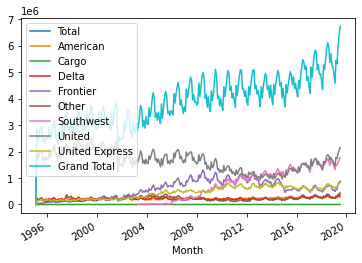

In [16]:
passengers_df.plot()

We don't really need to plot the "Total", "Grand Total", and "Cargo" since we want to visualize the monthly passenger data of each airline.

In [17]:
passengers_df.drop(columns=['Total','Cargo','Grand Total'],inplace=True)
passengers_df.head()

,American,Delta,Frontier,Other,Southwest,United,United Express
Month,,,,,,,
1995-02-01,5833,4805,1434,8625,NaN,47230,2635
1995-03-01,228196,200964,36703,245171,NaN,1962445,169190
1995-04-01,184229,157853,40050,191393,NaN,1724836,124351
1995-05-01,187990,162622,41403,171425,NaN,1833305,135800
1995-06-01,229348,198499,43754,186030,NaN,1975754,170033


<AxesSubplot:xlabel='Month'>

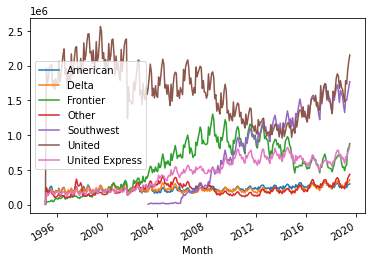

In [18]:
passengers_df.plot()

<span class="mark">**TODO for later**</span>

Experiment with improving the aesthetics of the default plot by using strategies like changing the [figure size](https://stackoverflow.com/a/51174822/1574687), using [subplots](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#subplots), and other [formatting strategies](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plot-formatting). See this [blog post by Nayomi Chibana](https://visme.co/blog/data-storytelling-tips/) for tips on improving data visualizations.

In [19]:
# Your code below



Making subplots is another possibility

NameError: name 'ticker' is not defined

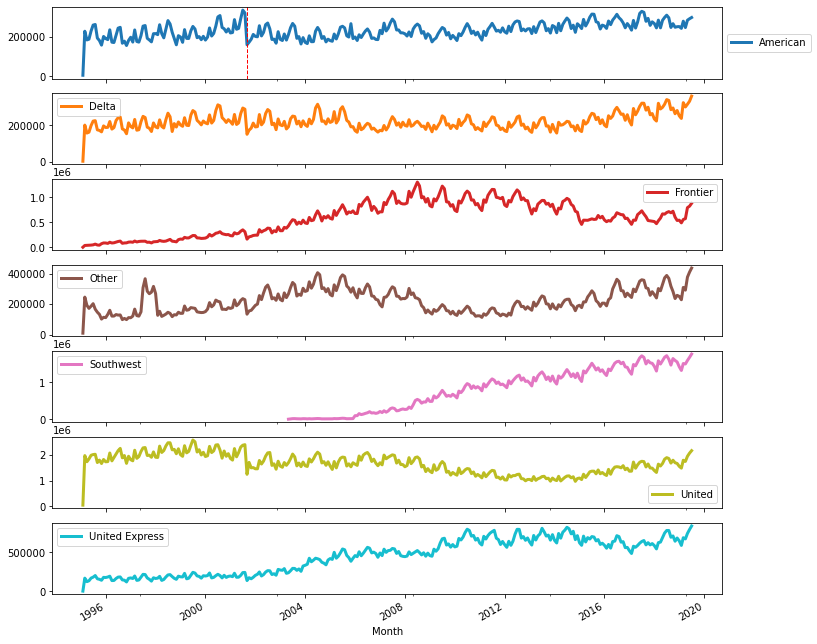

In [20]:
# Make the lines thicker (lw), make the figure larger (figsize), use a different colormap (cmap), and make subplots
axs = passengers_df.plot(lw=3,figsize=(12,12),cmap='tab10',subplots=True)

# Loop through each of the sub-axes
for ax in axs:
    # Add a vertical red dashed line for September 2001 and annotate
    ax.axvline('2001-09-01',c='r',ls='--',lw=1)
    
    # Put the legends on the outside
    ax.legend(loc='center left',bbox_to_anchor=(1,.5))
    
    # Make pretty ytick labels
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

### Melt the data

(Hint: pandas's `melt` and `stack` functions both turn columns into rows)

Let's use pandas's [`melt`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) function on your cleaned `passengers_df` to make it tidier. Note that you'll likely need to use `.reset_index()` on `passengers_df` to turn the "Month" index back into a column. Rename the columns so they're more interpretable too. 

Your melted data should look something like this:

| Month  | Airline | Count |
| --- | --- | --- |
| 1995-02-01 | American | 5833 |
| 1995-03-01 | American | 228196 |
| 1995-04-01 | American | 184229 |
| 1995-05-01 | American | 187990 |
| 1995-06-01 | American | 229348 |


**You need to make sure each variable has its own columns**

**STEPS**
* Use `.reset_index()` to turn indexes back to columns.
* Mutate column names with wither [`rename`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html?highlight=rename#pandas.DataFrame.rename) function or [`columns`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html?highlight=columns#pandas.DataFrame.columns) attribute.)

In [21]:
passengers_melt_df = pd.melt(passengers_df.reset_index(),id_vars=['Month'])
passengers_melt_df.columns = ['Month','Airline','Count']
passengers_melt_df.head()

,Month,Airline,Count
0,1995-02-01,American,5833.0
1,1995-03-01,American,228196.0
2,1995-04-01,American,184229.0
3,1995-05-01,American,187990.0
4,1995-06-01,American,229348.0


### Visualize the melted data
Use seaborn's [`lineplot`](https://seaborn.pydata.org/generated/seaborn.lineplot.html) to make a time series plot on the melted data.

<AxesSubplot:xlabel='Month', ylabel='Count'>

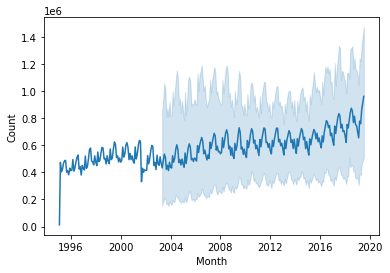

In [22]:
sb.lineplot(x='Month',y='Count',data=passengers_melt_df)

**<span class="mark">TODO</span>**
In the above plot also show the trend lines for different airlines.

*Hint: you can use the `hue` parameter*

<AxesSubplot:xlabel='Month', ylabel='Count'>

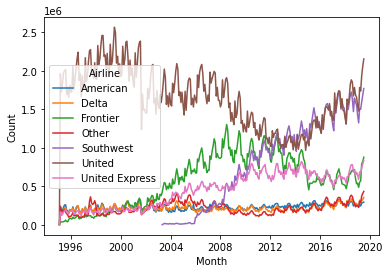

In [27]:
# Your code below

sb.lineplot(x='Month',y='Count', hue='Airline',data=passengers_melt_df)


#### Adding a new column month

Create a new column "Month_num" in your melted data: January is 1, February is 2, *etc*. If you use StackOverflow to [find a solution](https://stackoverflow.com/a/25149272/1574687), make sure to reference it.

In [24]:
passengers_melt_df['Month_num'] = pd.DatetimeIndex(passengers_melt_df['Month']).month
passengers_melt_df.head()

,Month,Airline,Count,Month_num
0,1995-02-01,American,5833.0,2
1,1995-03-01,American,228196.0,3
2,1995-04-01,American,184229.0,4
3,1995-05-01,American,187990.0,5
4,1995-06-01,American,229348.0,6


In [25]:
# Another alternative
passengers_melt_df['Month_num'] = passengers_melt_df['Month'].apply(lambda x:x.month)
passengers_melt_df.head()

,Month,Airline,Count,Month_num
0,1995-02-01,American,5833.0,2
1,1995-03-01,American,228196.0,3
2,1995-04-01,American,184229.0,4
3,1995-05-01,American,187990.0,5
4,1995-06-01,American,229348.0,6


**<span class="mark">TODO</span> for later**:

#### Separate the `date` column into year and months
(**Normie hint**: Access the month and year as attributes of a datetime/timestamp)  
(**Elite hint**: Use `.str.extract` and pass a regular expression that matches a 4 digit number for year and 2 digit number of month)

### Visualize

Use seaborn's [catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) to make a plot with "Month" on the x-axis and "Count" on the y-axis. What are some interesting patterns? What could be driving it?

<span class="mark">Also checkout the docs in catplot to see other option</span>, like `violinplot`

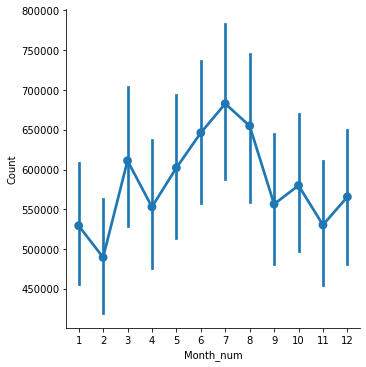

In [26]:
sb.catplot(x='Month_num',y='Count',data=passengers_melt_df,kind='point')
# Passengers are substantially higher in March than neighboring months: spring breakers?
# Passengers are substantiall lower in September than August: back to school

**To Think & Infer**: What are some interesting patterns? What could be driving it?

In [ ]:
# Subplot by airline, make the points overlap less (dodge), and make wider (aspect)
sb.catplot(x='Month_num',y='Count',hue='Airline',data=passengers_melt_df,kind='point',dodge=.5,aspect=2)

### Pivot the data
Create a new column "Year" in your melted data.

In [ ]:
passengers_melt_df['Year'] = pd.DatetimeIndex(passengers_melt_df['Month']).year
# passengers_melt_df['Year'] = passengers_melt_df['Month'].apply(lambda x:x.year) # Alternative

passengers_melt_df.head()

Use [`pivot_table`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) to convert the melted data with the year column into a "wide" format with "Year" as an index, "Airline" as columns, and "Count" as values. What are the values in the resulting DataFrame?

In [ ]:
passengers_pivot = passengers_melt_df.pivot_table(values='Count',index='Year',columns='Airline')
passengers_pivot

### Aggregate
Use an aggregate function in `pivot_table` to get the total number of passengers on that airline in that year.

In [ ]:
passengers_pivot_sum = passengers_melt_df.pivot_table(values='Count',index='Year',columns='Airline',aggfunc='sum')
passengers_pivot_sum

### Visualize

Visualize the pivot table with total annual passenger traffic by airline.

In [ ]:
ax = passengers_pivot_sum.plot(lw=3,figsize=(8,4))

# https://stackoverflow.com/a/43439132/1574687
ax.legend(loc='center left',bbox_to_anchor=(1,.5))

# The drop-off in 2019 is probably an artifact of only having data for a few months in the year

**TODOs to try later**

1. Compute average monthly passengers per flight
2. Plot average monthly passengers per flight. You can make a seaborn `catplot` with "month" on the x-axis, "passengers" on the y-axis, and hues for the different carriers. Is the top month still the same?